In [62]:
## Useful Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
#from sklearn.metrics import plot_confusion_matrix as pcm
#from sklearn.metrics import plot_precision_recall_curve as ppc
#from sklearn.metrics import plot_roc_curve as prc
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import cross_val_score as cv
from sklearn.svm import LinearSVC as linSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import fbeta_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer as norm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import MeanShift
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import KMeans


In [63]:
## Getting the data
import pandas as pd
df1 = pd.read_csv("reprocessed.hungarian.data", delim_whitespace = True, na_values = ["?", "-9"], names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "class" ])
df2 = pd.read_csv("processed.switzerland.data",sep = ',',na_values = ["?", "-9"], names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "class" ])
df3 = pd.read_csv("processed.va.data", sep = ',',na_values = ["?", "-9"] , names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "class" ])
df = pd.concat([df1, df2, df3])
df = df.reset_index(drop=True)

In [64]:
## Number of NaN in every feature:
print('Number of NaN in every feature:')
for i in df.columns:
    print(i +" / " + str(df[i].isna().sum()))

Number of NaN in every feature:
age / 0
sex / 0
cp / 0
trestbps / 59
chol / 30
fbs / 90
restecg / 2
thalach / 55
exang / 55
oldpeak / 62
slope / 309
ca / 606
thal / 484
class / 0


In [65]:
## Sparse attributes: NaN for more than 80% of instances
sparse_attributes = {}
for i in df:
    if df[i].isna().sum() > len(df[i])*0.8:
        sparse_attributes[i]=df[i].isna().sum()
print('sparse_attributes')
print(sparse_attributes)

sparse_attributes
{'ca': 606}


ratios of classes:
Class 0: 247
Class 1: 141
Class 2: 99
Class 3: 100
Class 4: 30


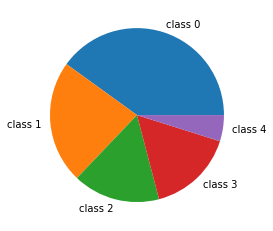

In [68]:
## ratios of classes:
print('ratios of classes:')
target_count = df['class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
#print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

#target_count.plot(kind='bar', title='Count (target)');
plt.pie(target_count, labels= ["class 0", "class 1", "class 2", "class 3", "class 4"], textprops={'fontsize': 10})
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [69]:
## remove sparse attributes and filling
df_lessAtt = df.drop(sparse_attributes, axis=1)

In [70]:
## train_test_split and imputation
features = df_lessAtt.iloc[:, 0:len(df_lessAtt.columns)-1]
class_feature = df["class"]
x_train, x_test, y_train, y_test = train_test_split(features, class_feature, test_size=0.33, random_state=42)
# Imputation
x_train_p = x_train.fillna(x_train.mean())
x_test_p = x_test.fillna(x_test.mean())

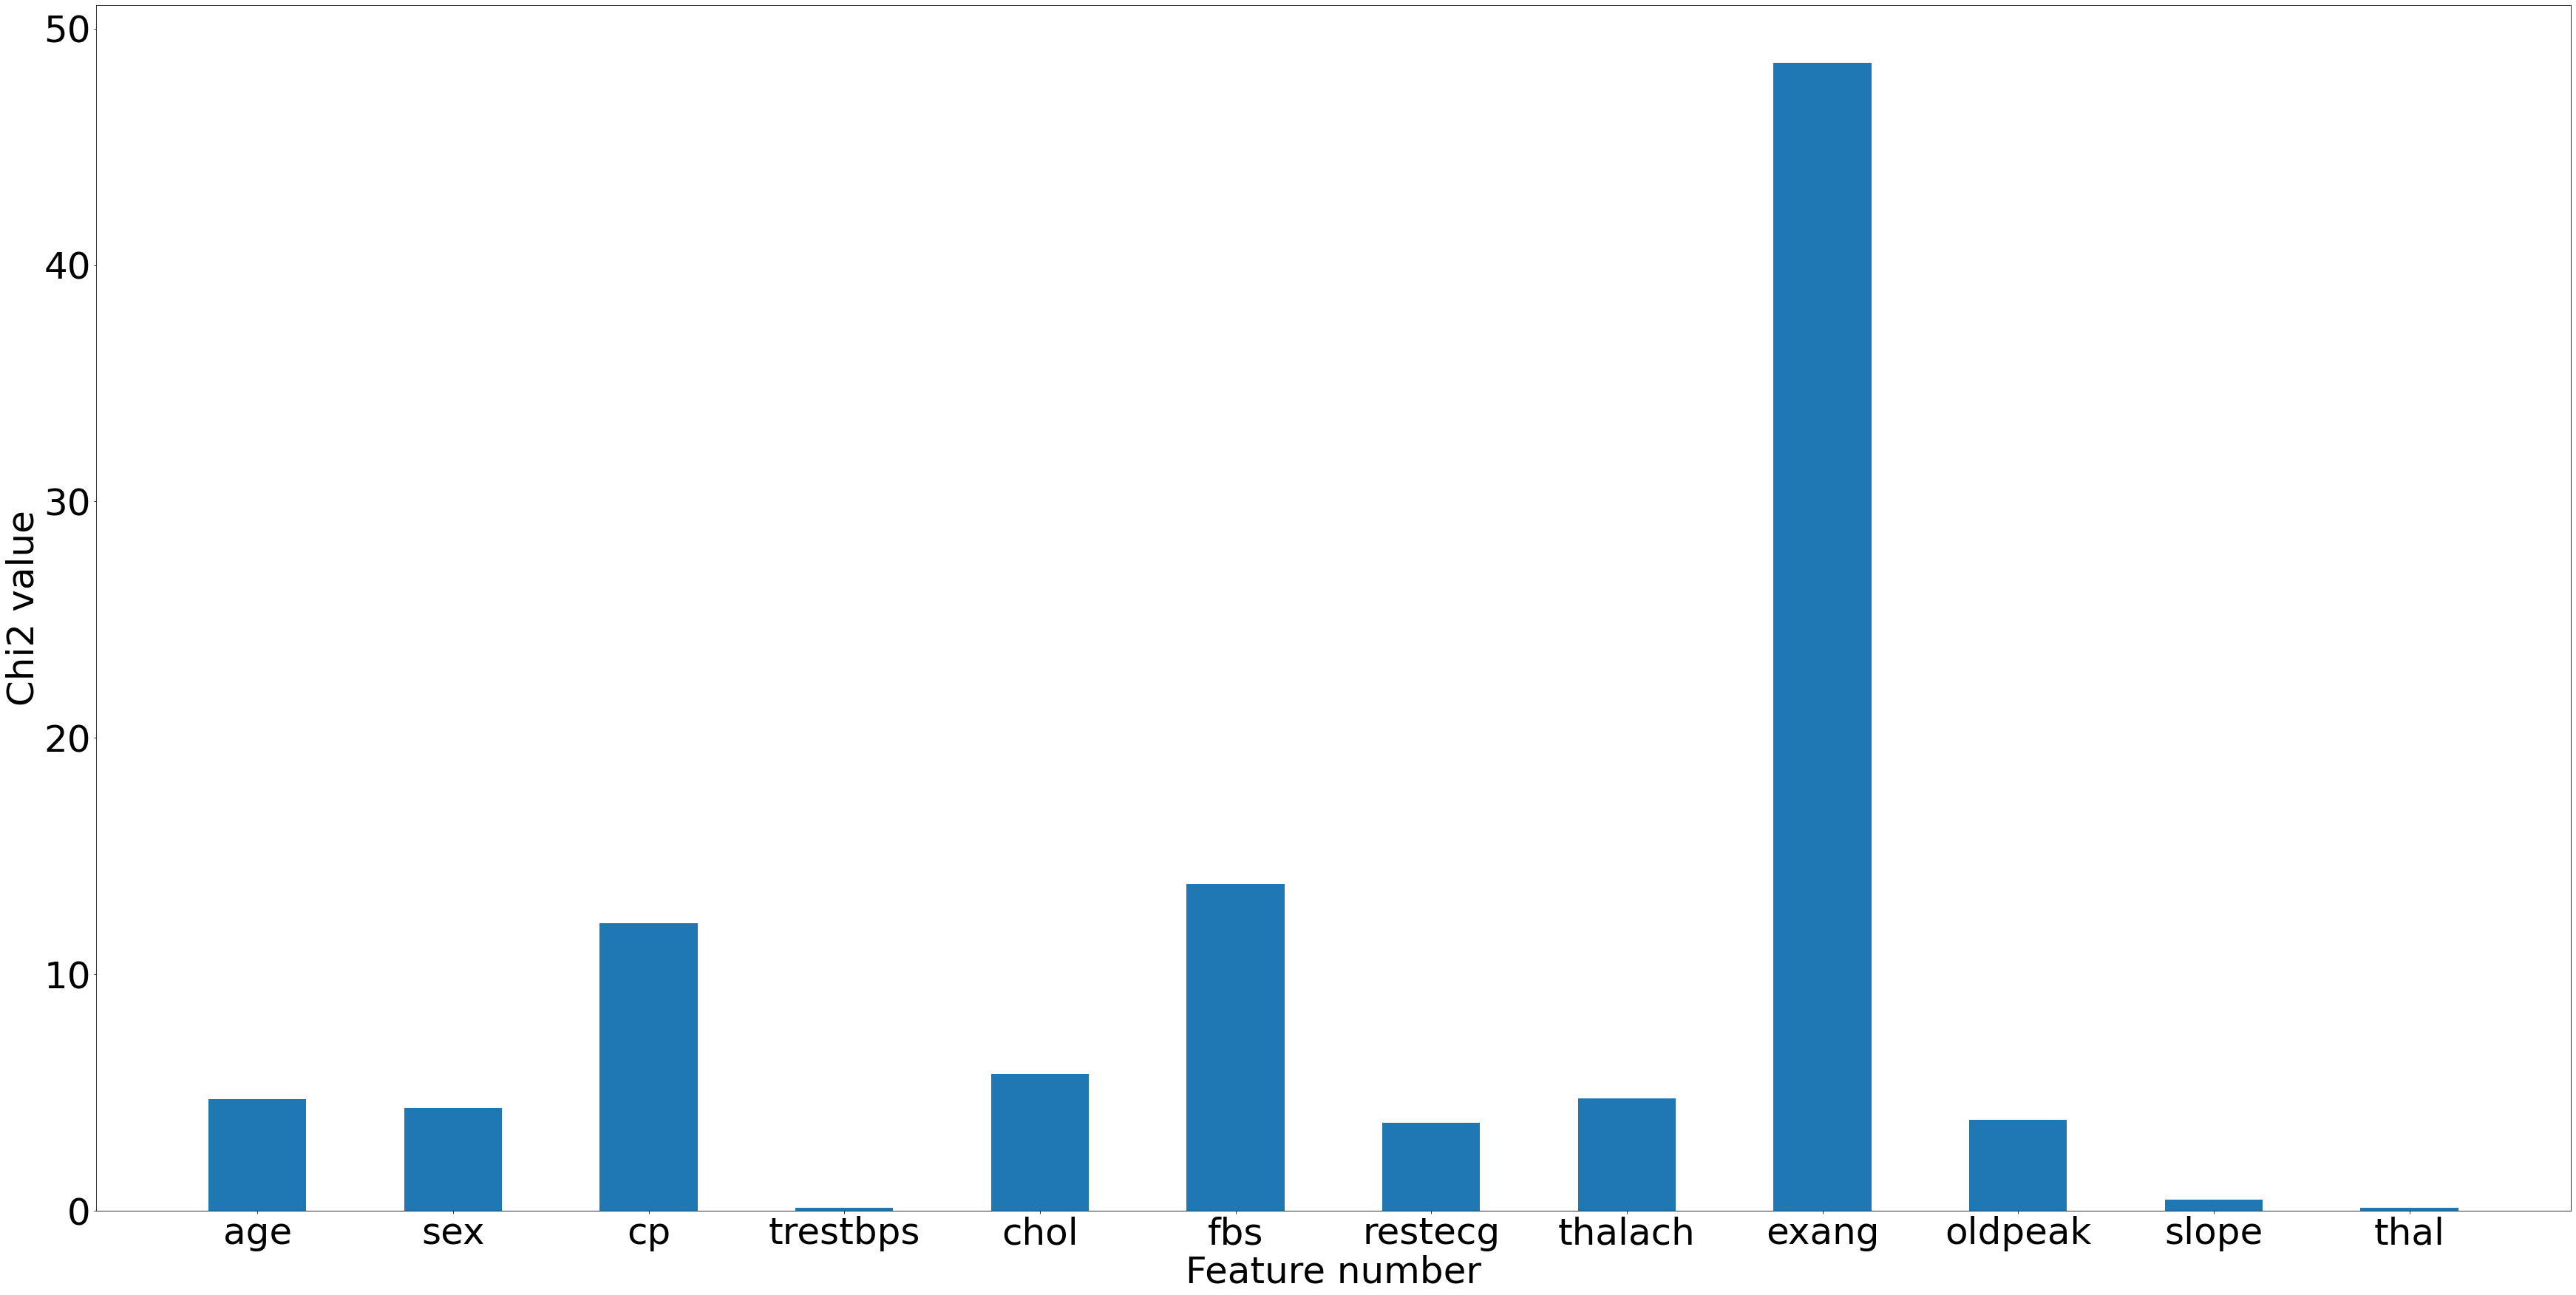

In [71]:
#Feature Selection Chi2 grading of the features
scaler = MinMaxScaler()
x_train_pp = scaler.fit_transform(x_train_p)
scores = chi2(x_train_pp, y_train)[0]
fig= plt.figure(figsize=(60,30))
plt.clf()
plt.bar(x_train_p.columns, scores, width=0.5)
plt.xlabel("Feature number", fontsize = 50)
plt.ylabel("Chi2 value", fontsize = 50)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.show()

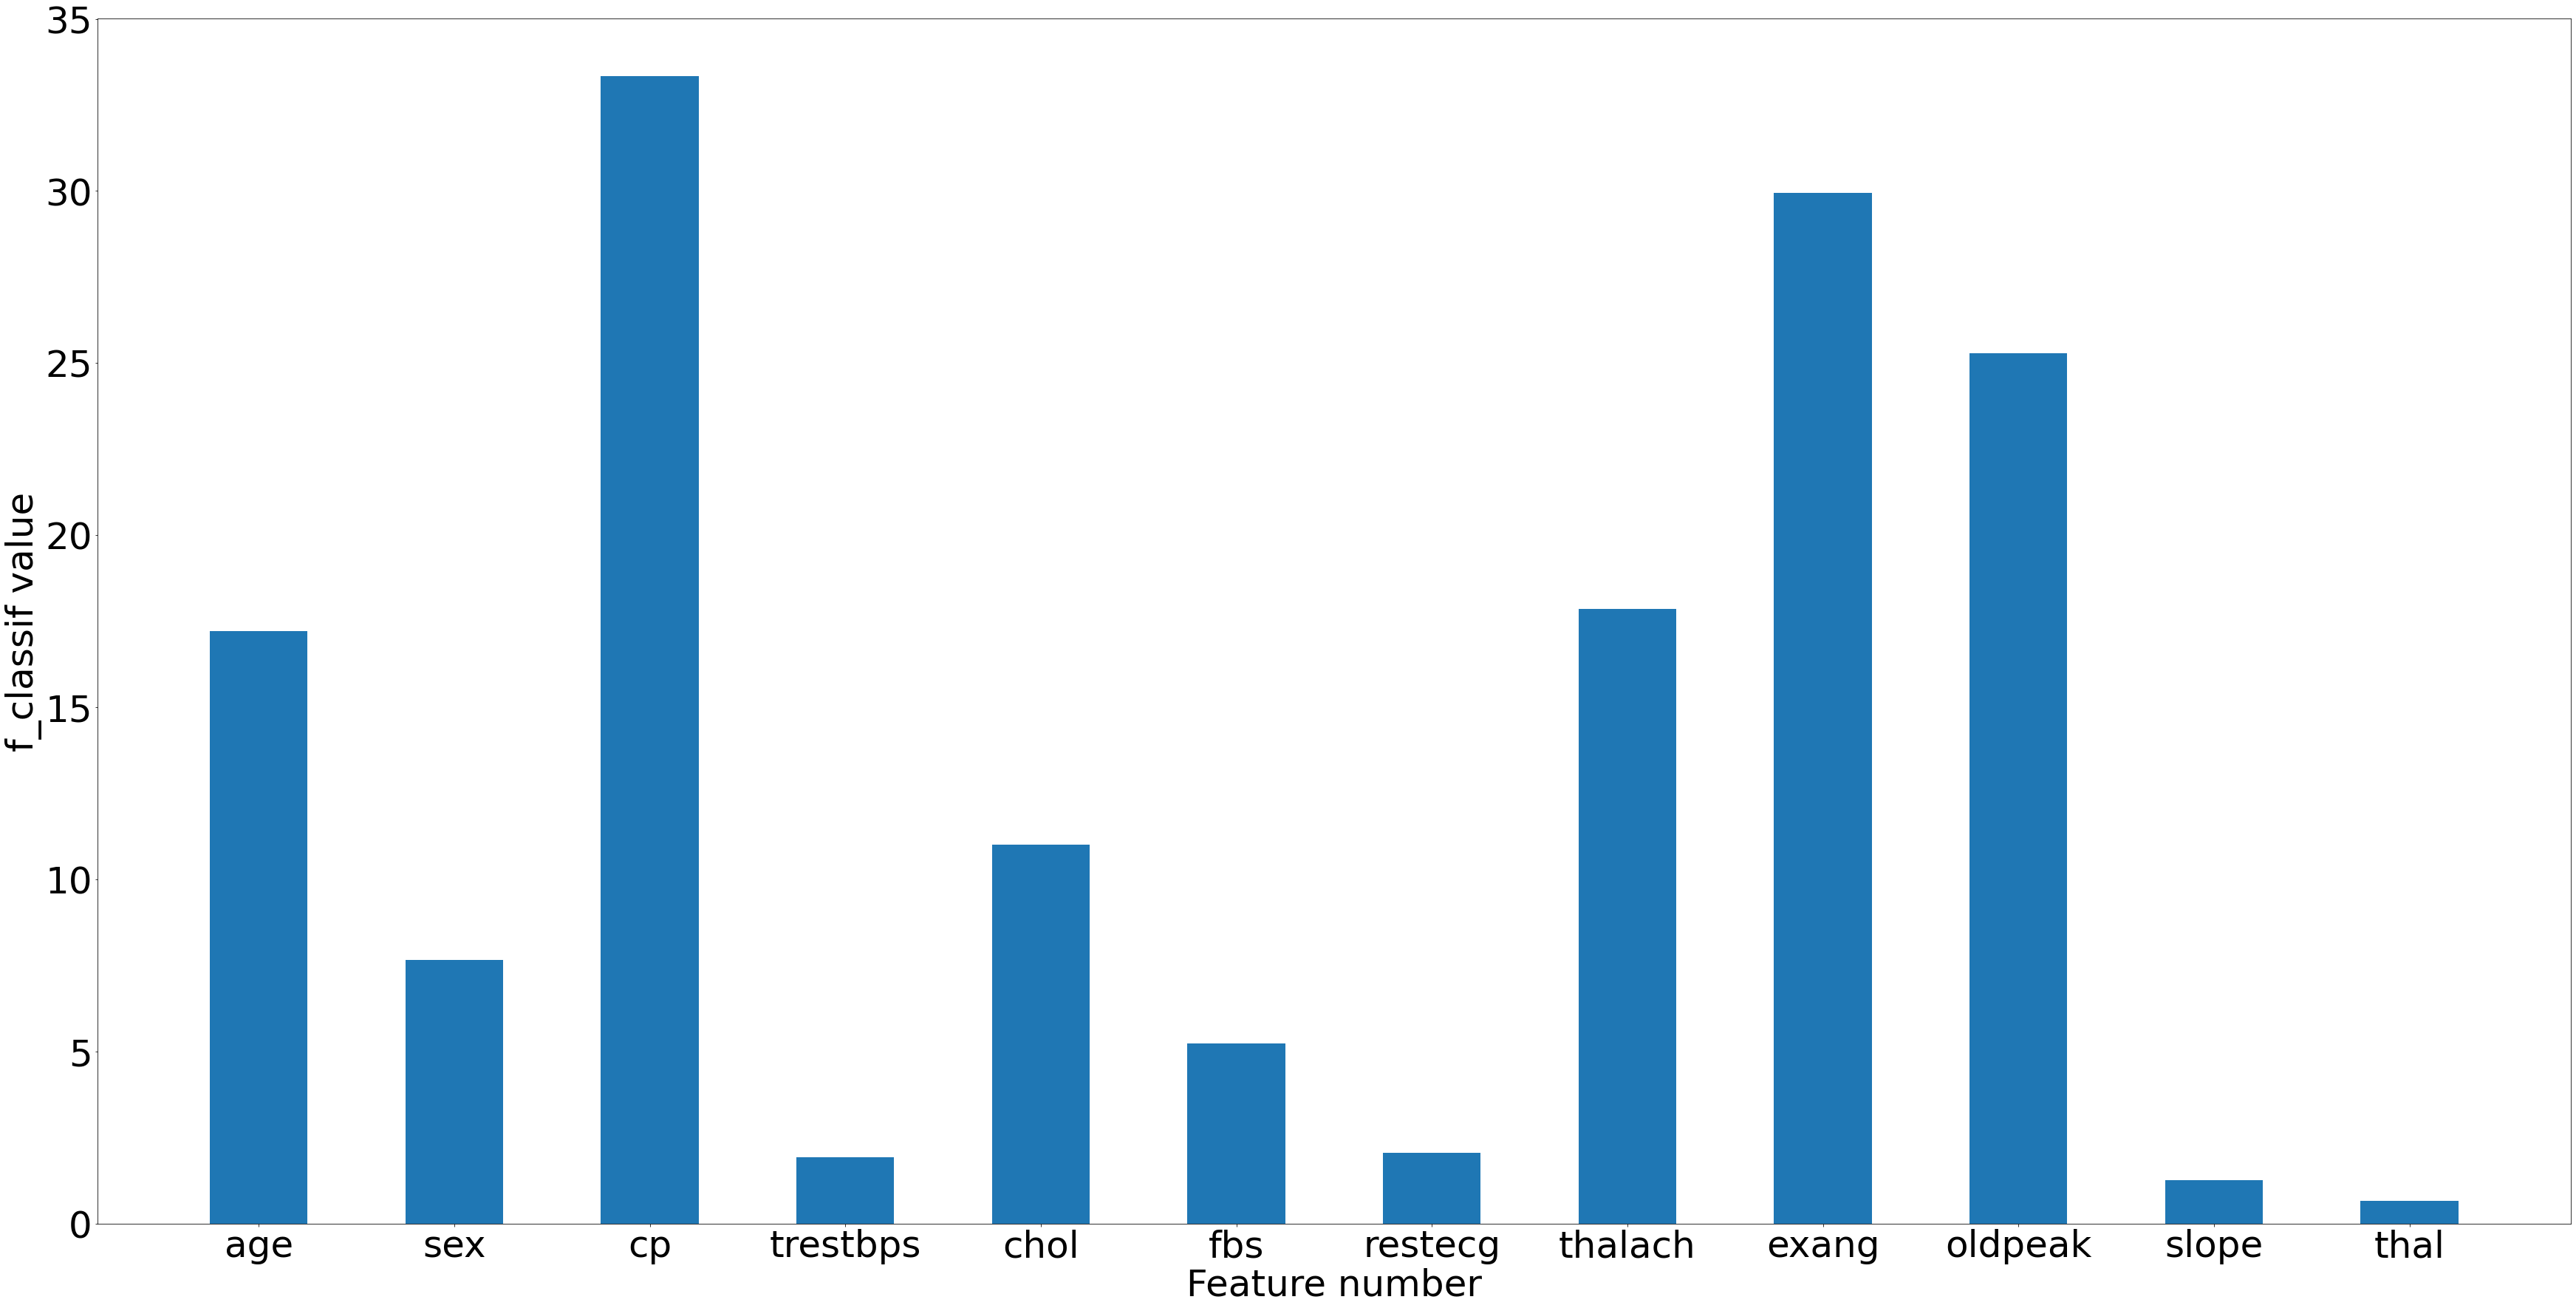

In [72]:
#Feature Selection F_classif grading of the features
scaler = MinMaxScaler()
x_train_pp = scaler.fit_transform(x_train_p)
scores = f_classif(x_train_pp, y_train)[0]
fig= plt.figure(figsize=(60,30))
plt.clf()
plt.bar(x_train_p.columns, scores, width=0.5)
plt.xlabel("Feature number", fontsize = 50)
plt.ylabel("f_classif value", fontsize = 50)
plt.tick_params(axis='both', which='major', labelsize=50) 
plt.show()

In [73]:
# Features importance based on DTC
scaler = MinMaxScaler()
x_train_pp = scaler.fit_transform(x_train_p)
clf = DTC()
clf = clf.fit(x_train_pp, y_train)
clf.feature_importances_ 

array([0.1962667 , 0.00477138, 0.11635032, 0.14370113, 0.16242132,
       0.04288838, 0.03979749, 0.11596157, 0.02691708, 0.09470446,
       0.02424369, 0.03197649])

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

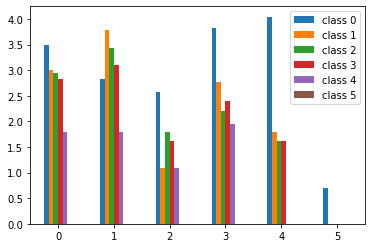

In [74]:
# clustering the data
clustering = KMeans(6).fit(x_train_p)
test_clustering = KMeans().fit(x_train_p).predict(x_test_p)

x_train_p_clustering = x_train_p.assign(clust = clustering.labels_)
x_test_p_clustering = x_test_p.assign(clust = test_clustering)
x_trainCS, x_testCS, y_trainCS, y_testCS = train_test_split(x_train_p_clustering, y_train, test_size=0.33, random_state=42)
df = pd.DataFrame({'class 0': np.log(x_train_p_clustering['clust'][y_train == 0].value_counts()),
                   'class 1': np.log(x_train_p_clustering['clust'][y_train == 1].value_counts()),
                   'class 2': np.log(x_train_p_clustering['clust'][y_train == 2].value_counts()),
                   'class 3': np.log(x_train_p_clustering['clust'][y_train == 3].value_counts()),
                   'class 4': np.log(x_train_p_clustering['clust'][y_train == 4].value_counts()),
                   'class 5': np.log(x_train_p_clustering['clust'][y_train == 5].value_counts())})
ax = df.plot.bar(rot=0)
plt.tick_params(axis='both', which='major', labelsize=10)
## the clusters couldn't differentiate between the classes

In [75]:
## Transform the class feature into binary (healthy:0, sick:1)
y_train_simple = []
for i in y_train:
    y_train_simple.append(int(i != 0))
#    print(i)
#    print(int(i != 0))

y_test_simple = []
for i in y_test:
    y_test_simple.append(int(i != 0))
#    print(i)
#    print(int(i != 0))

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

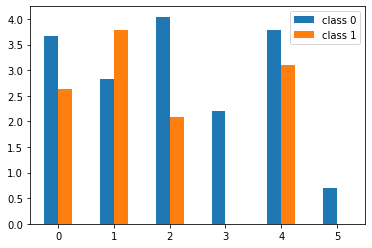

In [76]:
## clustering the binary class
clustering = KMeans(6).fit(x_train_p)
test_clustering = KMeans().fit(x_train_p).predict(x_test_p)

x_train_p_clustering = x_train_p.assign(clust = clustering.labels_)
x_test_p_clustering = x_test_p.assign(clust = test_clustering)
x_trainCS, x_testCS, y_trainCS, y_testCS = train_test_split(x_train_p_clustering, y_train_simple, test_size=0.33, random_state=42)
df = pd.DataFrame({'class 0': np.log(x_train_p_clustering['clust'][y_train == 0].value_counts()),
                   'class 1': np.log(x_train_p_clustering['clust'][y_train == 1].value_counts())})
ax = df.plot.bar(rot=0)
plt.tick_params(axis='both', which='major', labelsize=10)
## Better separated

In [77]:
## testing GNB
clf = GaussianNB()
pipe = make_pipeline(MinMaxScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, x_train_p, y_train_simple)
print('cv_results')
print(cv_results)
y_predict_logreg = clf.fit(x_train_p, y_train_simple).predict(x_test_p)
print('train/test')
print(accuracy_score(y_test_simple,y_predict_logreg))
## good accuracy

cv_results
[0.84337349 0.8313253  0.79518072 0.85365854 0.80487805]
train/test
0.8137254901960784


In [78]:
## logreg
clf =LogisticRegression(penalty='l2', dual=False, tol=0.01, C=200, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(MinMaxScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, x_train_p, y_train_simple)
print('cv_results')
print(cv_results)
y_predict_logreg = clf.fit(x_train_p, y_train_simple).predict(x_test_p)
print('train/test')
print(accuracy_score(y_test_simple,y_predict_logreg))
## best accuracy

cv_results
[0.85542169 0.80722892 0.78313253 0.82926829 0.82926829]
train/test
0.8137254901960784


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [79]:
## Hyperparameter tuning
parameter_grid = {
    "tol": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2),
    "C": (0.1, 1, 10, 50, 100, 200, 500)}

clf = LogisticRegression()
pipe = make_pipeline(MinMaxScaler(), clf)
search = RandomizedSearchCV(clf, parameter_grid, random_state=0)

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=parameter_grid,
    n_iter=40,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

result = search.fit(x_train_p, y_train_simple)
print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)
print(result.best_params_)


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Performing grid search...
Hyperparameters to be evaluated:
{'C': (0.1, 1, 10, 50, 100, 200, 500),
 'tol': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2)}
{'tol': 0.0001, 'C': 200}


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [80]:
## df of heart-diseased (classes 2,3,4,5)
df = pd.concat([df1, df2, df3])
df_trim = df[df['class'] >0]
## processing the data the same way
df_trim_lessAtt = df_trim.drop(sparse_attributes, axis=1)
features_trim = df_trim_lessAtt.iloc[:, 0:len(df_trim_lessAtt.columns)-1]
class_feature_trim = df_trim["class"]
x_train_trim, x_test_trim, y_train_trim, y_test_trim = train_test_split(features_trim, class_feature_trim, test_size=0.33, random_state=42)
x_train_trim_p = x_train_trim.fillna(x_train_trim.mean())
x_test_trim_p = x_test_trim.fillna(x_test_trim.mean())

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

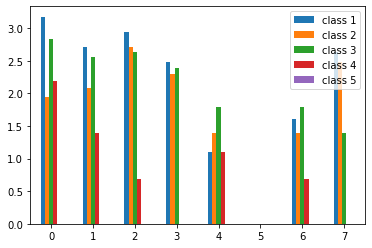

In [82]:
## clustering for the heart-diseased (classes 2,3,4,5)
clustering = KMeans(8).fit(x_train_trim_p)
test_clustering = KMeans().fit(x_train_trim_p).predict(x_test_trim_p)

x_train_p_clustering = x_train_trim_p.assign(clust = clustering.labels_)
x_test_p_clustering = x_test_trim_p.assign(clust = test_clustering)
x_trainCS, x_testCS, y_trainCS, y_testCS = train_test_split(x_train_p_clustering, y_train_trim, test_size=0.33, random_state=42)
df = pd.DataFrame({'class 1': np.log(x_train_p_clustering['clust'][y_train_trim == 1].value_counts()),
                   'class 2': np.log(x_train_p_clustering['clust'][y_train_trim == 2].value_counts()),
                   'class 3': np.log(x_train_p_clustering['clust'][y_train_trim == 3].value_counts()),
                   'class 4': np.log(x_train_p_clustering['clust'][y_train_trim == 4].value_counts()),
                   'class 5': np.log(x_train_p_clustering['clust'][y_train_trim == 5].value_counts())})
ax = df.plot.bar(rot=0)
plt.tick_params(axis='both', which='major', labelsize=10)
## the clusters couldn't differentiate between the classes

In [83]:
## testing some GNB
y_predict_GNB = GaussianNB().fit(x_train_trim_p, y_train_trim).predict(x_test_trim_p)
print(accuracy_score(y_test_trim,y_predict_GNB))

0.3170731707317073


In [84]:
## testing logreg
clf =LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(MinMaxScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, x_train_trim_p, y_train_trim)
print(cv_results)
y_predict_logreg = clf.fit(x_train_trim_p, y_train_trim).predict(x_test_trim_p)
print(accuracy_score(y_test_trim,y_predict_logreg))

[0.46       0.36       0.30612245 0.36734694 0.32653061]
0.3983739837398374


C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [85]:
## testing DTC
clf = DTC()
pipe = make_pipeline(MinMaxScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf, x_train_trim_p, y_train_trim)
print('cv_results')
print(cv_results)
y_predict_DTC = clf.fit(x_train_trim_p, y_train_trim).predict(x_test_trim_p)
print('train/test')
print(accuracy_score(y_test_trim,y_predict_DTC))

cv_results
[0.22       0.4        0.24489796 0.30612245 0.36734694]
train/test
0.34959349593495936


In [87]:
## combining the two methods
#best performing algorithm

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_train_trim_p = x_train_trim_p.reset_index(drop=True)
x_test_trim_p = x_test_trim_p.reset_index(drop=True)
y_train_trim = y_train_trim.reset_index(drop=True)
y_test_trim = y_test_trim.reset_index(drop=True)

clf1 =LogisticRegression(penalty='l2', dual=False, tol=0.01, C=200, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
pipe = make_pipeline(MinMaxScaler(), clf)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf1, x_train_p, y_train_simple)
print('healthy/sick stage: cv_results')
print(cv_results)
print('\n')
y_predict1 = clf1.fit(x_train_p, y_train_simple).predict(x_test_p)
print('healthy/sick stage: train/test acc')
print(accuracy_score(y_test_simple,y_predict1))
print('\n')

y_healthy_index = [i for i in range(len(y_predict1)) if y_predict1[i] == 0]
y_test_healthy = y_test.iloc[y_healthy_index]
y_sick_index = [i for i in range(len(y_predict1)) if y_predict1[i] == 1]
x_test_sick = x_test_p.iloc[y_sick_index]
y_test_sick = y_test.iloc[y_sick_index]
clf2 = DTC(random_state = 42, max_features = 'log2', max_depth = 10)
pipe = make_pipeline(MinMaxScaler(), clf2)
#it = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
#fthree_scorer = make_scorer(fbeta_score, beta=3)
cv_results = cv(clf2, x_train_trim_p, y_train_trim)
print('disease severity stage: cv_results')
print(cv_results)
print('\n')
y_predict11 = y_predict1[y_healthy_index]
y_predict2 = clf2.fit(x_train_trim_p, y_train_trim).predict(x_test_sick)
print('disease severity stage: train/test acc')
print(accuracy_score(y_test_sick,y_predict2))
print('\n')
y_true_added = pd.concat([y_test_healthy,y_test_sick])
y_predict = np.concatenate([y_predict11, y_predict2])
print('overall acc')
print(accuracy_score(y_true_added,y_predict))

C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mouna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

healthy/sick stage: cv_results
[0.85542169 0.80722892 0.78313253 0.82926829 0.82926829]


healthy/sick stage: train/test acc
0.8137254901960784


disease severity stage: cv_results
[0.28       0.4        0.42857143 0.42857143 0.40816327]


disease severity stage: train/test acc
0.5867768595041323


overall acc
0.6519607843137255
